# optimizing hyperparameters in decision tree with python
Qiudong Deng
qddeng@gmail.com

In [3]:
#set wd

import os
os.getcwd()
os.chdir('E:/2016 spring course/msa 8150/final project proposal')
os.getcwd()

# import modules
import pandas as pd
import numpy as np
import subprocess

#read data in-1
#data from https://archive.ics.uci.edu/ml/machine-learning-databases/
df = pd.read_csv("adult with col names with na.csv", index_col=0)
#list(df)


ncol = len(df.axes[1])
nrow=len(df.axes[0])
print("%s x %s" % (nrow, ncol)) #check dimension 
print (df.dtypes) #check data types

# count freq
#df.groupby('y').count()

#convert object col to int64 and rename-2
n = ncol
for i in range(0,n):
       if (df.iloc[:,i].dtype==object):
        A= df.iloc[:,i].unique()
        map_to_int = {name: n for n, name in enumerate(A)}
        df.iloc[:,i] = df.iloc[:,i].replace(map_to_int)
print (df.dtypes)


#first n-1col as features, and the last one as target
df1=df.iloc[:,0:n]
features = list(df1.columns[:(n-1)])
print("* features:", features, sep="\n")
df1.rename(columns={'y':'Target'}, inplace=True)
#list(df1)
#df1

y = df1["Target"]
X = df1[features]

#split data to train and test-3
from sklearn.cross_validation import train_test_split

train, test = train_test_split(df1, test_size = 0.5)

#using train set to construct tree-4
y = train["Target"]
X = train[features]

32561 x 15
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
y                 object
dtype: object
age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
y                 int64
dtype: object
* features:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [2]:
print(__doc__)

import numpy as np

from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# data from above section

Automatically created module for IPython interactive environment


In [3]:
# build a classifier
clf = DecisionTreeClassifier()



# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

             
        
#specify parameters and distributions to sample from
param_dist = {"max_depth": [3,2,1, None],
              "max_features": sp_randint(1, 15),
              "min_samples_split": sp_randint(1, 5000),
              "min_samples_leaf": sp_randint(1, 5000),
        
              "random_state":[100,None],
              "presort": [True, False],
              "class_weight":[ "balanced" , None],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 1000
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

RandomizedSearchCV took 200.29 seconds for 1000 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.843 (std: 0.005)
Parameters: {'presort': False, 'min_samples_leaf': 692, 'criterion': 'gini', 'max_features': 12, 'random_state': 100, 'class_weight': None, 'min_samples_split': 2978, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.841 (std: 0.008)
Parameters: {'presort': True, 'min_samples_leaf': 158, 'criterion': 'entropy', 'max_features': 10, 'random_state': None, 'class_weight': None, 'min_samples_split': 3742, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.838 (std: 0.006)
Parameters: {'presort': False, 'min_samples_leaf': 269, 'criterion': 'entropy', 'max_features': 9, 'random_state': None, 'class_weight': None, 'min_samples_split': 882, 'max_depth': None}



In [18]:
# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")


f = list(np.arange(9,14,1))  
s = list(np.arange(1,5001,500))
            
# use a full grid over all parameters
param_grid = { "max_features": f,
              "min_samples_split": s,
              "min_samples_leaf": s,
              "max_depth": [3,2,1, None],
              "class_weight":[ "balanced" , None],
            "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

GridSearchCV took 2975.17 seconds for 8000 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.859 (std: 0.003)
Parameters: {'min_samples_leaf': 1, 'criterion': 'entropy', 'max_features': 10, 'class_weight': None, 'min_samples_split': 501, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.858 (std: 0.002)
Parameters: {'min_samples_leaf': 1, 'criterion': 'gini', 'max_features': 10, 'class_weight': None, 'min_samples_split': 501, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.858 (std: 0.003)
Parameters: {'min_samples_leaf': 1, 'criterion': 'gini', 'max_features': 11, 'class_weight': None, 'min_samples_split': 501, 'max_depth': None}



In [8]:
#using default

from sklearn.tree import DecisionTreeClassifier
# data from above section

# build a classifier
clf = DecisionTreeClassifier()

clf.fit(X, y)

from sklearn import datasets
from sklearn import metrics   
expected = test["Target"]
X1 = test[features]
predicted2 = clf.predict(X1)

print(metrics.classification_report(expected, predicted2))
print(metrics.confusion_matrix(expected, predicted2))


# roc 
probas1_ = clf.fit(X,y).predict_proba(X1)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate1, true_positive_rate1, thresholds = roc_curve(expected,probas1_[:, 1])
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
roc_auc1

             precision    recall  f1-score   support

          0       0.88      0.87      0.88     12336
          1       0.61      0.63      0.62      3945

avg / total       0.82      0.82      0.82     16281

[[10767  1569]
 [ 1440  2505]]


0.75196540589723482

In [9]:
#using best parameters in random 

from sklearn.tree import DecisionTreeClassifier
# data from above section

# build a classifier
clf = DecisionTreeClassifier(min_samples_leaf=88, presort = False, max_features =9, 
        random_state= None, class_weight = None, 
        criterion = 'gini', max_depth = None, min_samples_split = 564)

clf.fit(X, y)
from sklearn import datasets
from sklearn import metrics   
expected = test["Target"]
X1 = test[features]
predicted2 = clf.predict(X1)

print(metrics.classification_report(expected, predicted2))
print(metrics.confusion_matrix(expected, predicted2))


# roc 
probas2_ = clf.fit(X, y).predict_proba(X1)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate2, true_positive_rate2, thresholds = roc_curve(expected,probas2_[:, 1])
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
roc_auc2


             precision    recall  f1-score   support

          0       0.88      0.94      0.91     12336
          1       0.76      0.60      0.67      3945

avg / total       0.85      0.86      0.85     16281

[[11596   740]
 [ 1597  2348]]


0.90461535189596254

In [10]:
#use the best parameters from RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', max_features=5, bootstrap= False,
                             
                             class_weight= None,
                             max_depth=None,
                             min_samples_leaf=1,
                            min_samples_split=501)
clf.fit(X, y)


from sklearn import datasets
from sklearn import metrics   
expected = test["Target"]
X1 = test[features]
predicted3 = clf.predict(X1)

print(metrics.classification_report(expected, predicted3))
print(metrics.confusion_matrix(expected, predicted3))

             precision    recall  f1-score   support

          0       0.89      0.94      0.91     12336
          1       0.76      0.63      0.69      3945

avg / total       0.86      0.86      0.86     16281

[[11548   788]
 [ 1472  2473]]


In [11]:
# roc 
probas3_ = clf.fit(X, y).predict_proba(X1)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate3, true_positive_rate3, thresholds = roc_curve(expected,probas3_[:, 1])
roc_auc3 = auc(false_positive_rate3, true_positive_rate3)
roc_auc3

0.91580156751638542

In [31]:
#

             precision    recall  f1-score   support

          0       0.86      0.92      0.89     12340
          1       0.68      0.52      0.59      3941

avg / total       0.82      0.83      0.82     16281

[[11375   965]
 [ 1881  2060]]


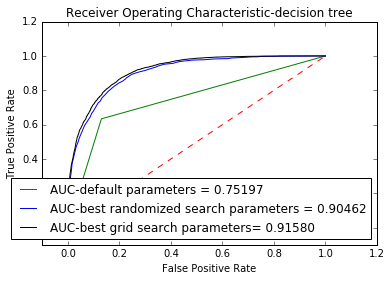

In [13]:
%matplotlib inline

plt.title('Receiver Operating Characteristic-decision tree')
plt.plot(false_positive_rate1, true_positive_rate1, 'g',
label='AUC-default parameters = %0.5f'% roc_auc1)


plt.plot(false_positive_rate2, true_positive_rate2, 'b',
label='AUC-best randomized search parameters = %0.5f'% roc_auc2)

plt.plot(false_positive_rate3, true_positive_rate3, 'black',
label='AUC-best grid search parameters= %0.5f'% roc_auc3)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()